In [144]:
import torch
from torch import nn
import numpy as np

In [145]:
# load data 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [146]:
housing = fetch_california_housing()

In [148]:
X, X_test, y, y_test = train_test_split(housing.data, housing.target, test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [149]:
X_train.shape, X_valid.shape, X_test.shape

((13209, 8), (3303, 8), (4128, 8))

In [150]:
y_train

array([1.769, 1.733, 2.047, ..., 2.153, 1.39 , 1.813])

In [151]:
X_train, X_valid, X_test = torch.Tensor(X_train), torch.Tensor(X_valid), torch.Tensor(X_test)
y_train, y_valid, y_test = torch.Tensor(y_train).reshape((-1, 1)), torch.Tensor(y_valid).reshape((-1, 1)), torch.Tensor(y_test).reshape((-1, 1))

In [152]:
X_train, y_train

(tensor([[ 0.4434, -0.1245,  0.5205,  ...,  0.0517,  1.1028, -0.6916],
         [ 0.0032, -1.0777, -0.1708,  ..., -0.0552, -0.7249,  0.8544],
         [-0.5218, -0.2039, -0.0613,  ..., -0.0170, -0.8843,  0.8644],
         ...,
         [ 0.0611, -0.8394,  0.0611,  ...,  0.0311, -1.3623,  1.2933],
         [ 0.3399, -0.9983, -0.4748,  ..., -0.1376, -0.8468,  0.8544],
         [ 0.1752,  0.5110, -0.4947,  ..., -0.0077, -0.8140,  0.6300]]),
 tensor([[1.7690],
         [1.7330],
         [2.0470],
         ...,
         [2.1530],
         [1.3900],
         [1.8130]]))

In [153]:
X_train.shape, y_train.shape

(torch.Size([13209, 8]), torch.Size([13209, 1]))

In [154]:
# load data
from torch.utils import data

def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays) # The parameters *tensors means tensors that have the same size of the first dimension.
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [155]:
batch_size = 4403
data_iter = load_array((X_train, y_train), batch_size)

In [156]:
next(iter(data_iter))

[tensor([[-0.5431, -1.4749, -0.2469,  ..., -0.0949,  1.4168, -0.8661],
         [ 0.3215, -1.1571,  0.0391,  ..., -0.0338, -0.1485, -0.6217],
         [-0.3733,  0.4315,  0.1639,  ..., -0.0047, -0.5281,  1.1387],
         ...,
         [-0.5785, -0.9188, -0.0719,  ...,  0.0338, -0.7203,  1.0739],
         [-0.4697, -0.5217, -0.2477,  ..., -0.0850, -0.7296,  0.9492],
         [-0.2494,  0.4315, -0.1223,  ..., -0.0043, -0.7390,  0.8245]]),
 tensor([[1.3060],
         [1.9270],
         [0.7430],
         ...,
         [1.0980],
         [1.4880],
         [1.8880]])]

In [165]:
# build model
model = nn.Sequential(nn.Linear(8, 256),
                     nn.ReLU(),
                     nn.Linear(256, 1))

In [166]:
# init weights and biases
def init_params(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
        nn.init.
        
model.apply(init_params)
# model[0].weight.data.normal_(0, 0.01)
# model[0].bias.data.fill_(0)

Sequential(
  (0): Linear(in_features=8, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=1, bias=True)
)

In [167]:
# select loss L2 loss
loss = nn.MSELoss()

In [168]:
# choose optimizer
trainer = torch.optim.SGD(model.parameters(), lr=0.03)

In [169]:
# train model
num_epochs = 30
ls = []
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(model(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(model(X_train), y_train)
    ls.append(l.detach().numpy())
    # print(f'epoch {epoch + 1}, loss {l:f}')

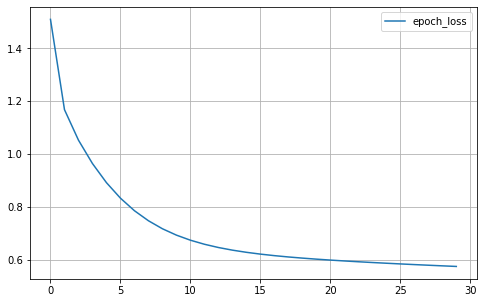

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(ls, columns=['epoch_loss']).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [171]:
model(X_test[:3])

tensor([[0.9783],
        [1.5969],
        [2.3733]], grad_fn=<AddmmBackward>)

In [172]:
y_test[:3]

tensor([[0.4770],
        [0.4580],
        [5.0000]])